In [37]:
from fragalysis_api.xcimporter.single_import import import_single_file
from fragalysis_api.xcimporter.align import Align
from pathlib import Path
import mdtraj as md
import numpy as np

In [38]:
def rmsd(x, y, ix):
    """
    rmsd in Angstroms
    """
    diff = x.xyz[0, ix, :] - y.xyz[0, ix, :]
    rmsd = np.sqrt(np.mean(np.sum(diff**2, axis=-1), axis=0))
    return rmsd*10
    

## Determining the reference structure for MPro dataset

Determine the reference structure using the fragalysis API: 

In [39]:
structures = Align(directory='Mpro/crystallographic',  mono=False)
structures._get_ref

'Mpro-x12321'

Now determine the reference structure by computing the difference in rmsd between structures in crystollographic and aligned folders (x forms only):

array([[<AxesSubplot:title={'center':'rmsd'}>]], dtype=object)

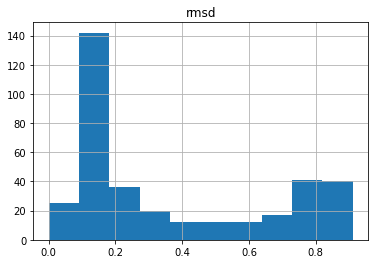

In [40]:
x_files = list(Path('MPro/crystallographic/').glob('Mpro-x*.pdb'))
x_files.sort()
results = {'pdb': [], 'rmsd': []}

for file in x_files:
    test_pdb = str(file.stem)
    pdb1 = md.load(f'MPro/aligned/{test_pdb}_0A/{test_pdb}_0A_bound.pdb')
    pdb2 = md.load(f'MPro/crystallographic/{test_pdb}.pdb')
    
    ca_idx = pdb2.top.select('name CA')
    
    results['pdb'].append(test_pdb)
    results['rmsd'].append(rmsd(pdb1, pdb2, ix = ca_idx))
df = pd.DataFrame(results)
df.hist()


In [41]:
df.sort_values(by='rmsd', ascending=True).head()

,pdb,rmsd
161,Mpro-x1119,0.000000
35,Mpro-x0749,0.041886
22,Mpro-x0478,0.052128
221,Mpro-x1163,0.054323
9,Mpro-x0336,0.062246


In [42]:
df.loc[df.pdb=='Mpro-x12321']

,pdb,rmsd
259,Mpro-x12321,0.362716


So the two reference structures are different. Let's check this by using the `align_to_reference` function and comparing the RMSDs. 

In [43]:
from fragalysis_api.xcimporter.align import Structure

In [50]:
ref = Path('MPro/crystallographic/Mpro-x1119.pdb')
# structures = Align(directory='Mpro/crystallographic', pdb_ref=str(ref.stem),  mono=False)

results = {'pdb': [], 'rmsd': []}

for path in x_files:
    test_pdb = str(path.stem)
    
#     structures.align_to_reference(f'MPro/crystallographic/{test_pdb}.pdb', reference=str(ref), out_dir='Test')
    target_pdb = Structure.from_file(path)
    ref_pdb = Structure.from_file(ref)
    target_pdb, transform = target_pdb.align_to(other=ref_pdb, monomerized=False)
    target_pdb.structure.write_pdb(f'Test/{test_pdb}_bound.pdb')
    
    pdb1 = md.load(f'MPro/aligned/{test_pdb}_0A/{test_pdb}_0A_bound.pdb')
    pdb2 = md.load(f'Test/{test_pdb}_bound.pdb')
        
    ca_idx = pdb2.top.select('name CA')
    results['pdb'].append(test_pdb)
    results['rmsd'].append(rmsd(pdb1, pdb2, ix = ca_idx))
    
df2 = pd.DataFrame(results)

Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping Ligand...
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue not found in chain
Skipping, Residue n